In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Ireland_2019

In [5]:
Ireland_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
6,6,MR Adair (IRE),9,8,2,117,32,19.50,101,115.84,...,509,15,4/19,33.93,6.30,32.2,2,0,2,0
31,31,A Balbirnie (IRE),14,13,1,567,145*,47.25,647,87.63,...,-,-,-,-,-,-,-,-,5,0
50,50,J Cameron-Dow (IRE),4,1,1,7,7*,-,10,70.00,...,151,5,3/32,30.20,4.87,37.2,0,0,2,0
83,83,GH Dockrell (IRE),10,8,0,143,54,17.87,223,64.12,...,420,8,3/51,52.50,5.67,55.5,0,0,4,0
108,108,SC Getkate (IRE),3,2,1,23,16*,23.00,23,100.00,...,120,6,2/30,20.00,4.44,27.0,0,0,1,0
184,184,JB Little (IRE),4,2,0,9,9,4.50,8,112.50,...,262,5,4/45,52.40,7.27,43.2,1,0,0,0
186,186,AR McBrine (IRE),9,5,1,18,9*,4.50,41,43.90,...,277,9,2/37,30.77,3.79,48.6,0,0,3,0
203,203,BJ McCarthy (IRE),4,4,1,28,18,9.33,42,66.66,...,204,4,2/76,51.00,6.27,48.7,0,0,0,0
204,204,JA McCollum (IRE),8,8,0,165,73,20.62,240,68.75,...,-,-,-,-,-,-,-,-,1,0
237,237,TJ Murtagh (IRE),13,7,3,27,12,6.75,49,55.10,...,565,16,5/21,35.31,4.77,44.3,0,1,3,0


In [6]:
Ireland_2019=Ireland_2019.reset_index()

In [7]:
Ireland_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,6,6,MR Adair (IRE),9,8,2,117,32,19.50,101,...,509,15,4/19,33.93,6.30,32.2,2,0,2,0
1,31,31,A Balbirnie (IRE),14,13,1,567,145*,47.25,647,...,-,-,-,-,-,-,-,-,5,0
2,50,50,J Cameron-Dow (IRE),4,1,1,7,7*,-,10,...,151,5,3/32,30.20,4.87,37.2,0,0,2,0
3,83,83,GH Dockrell (IRE),10,8,0,143,54,17.87,223,...,420,8,3/51,52.50,5.67,55.5,0,0,4,0
4,108,108,SC Getkate (IRE),3,2,1,23,16*,23.00,23,...,120,6,2/30,20.00,4.44,27.0,0,0,1,0
5,184,184,JB Little (IRE),4,2,0,9,9,4.50,8,...,262,5,4/45,52.40,7.27,43.2,1,0,0,0
6,186,186,AR McBrine (IRE),9,5,1,18,9*,4.50,41,...,277,9,2/37,30.77,3.79,48.6,0,0,3,0
7,203,203,BJ McCarthy (IRE),4,4,1,28,18,9.33,42,...,204,4,2/76,51.00,6.27,48.7,0,0,0,0
8,204,204,JA McCollum (IRE),8,8,0,165,73,20.62,240,...,-,-,-,-,-,-,-,-,1,0
9,237,237,TJ Murtagh (IRE),13,7,3,27,12,6.75,49,...,565,16,5/21,35.31,4.77,44.3,0,1,3,0


In [8]:
Ireland_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Ireland_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MR Adair (IRE),9,8,2,117,32,19.50,101,115.84,0,...,509,15,4/19,33.93,6.30,32.2,2,0,2,0
1,A Balbirnie (IRE),14,13,1,567,145*,47.25,647,87.63,3,...,-,-,-,-,-,-,-,-,5,0
2,J Cameron-Dow (IRE),4,1,1,7,7*,-,10,70.00,0,...,151,5,3/32,30.20,4.87,37.2,0,0,2,0
3,GH Dockrell (IRE),10,8,0,143,54,17.87,223,64.12,0,...,420,8,3/51,52.50,5.67,55.5,0,0,4,0
4,SC Getkate (IRE),3,2,1,23,16*,23.00,23,100.00,0,...,120,6,2/30,20.00,4.44,27.0,0,0,1,0
5,JB Little (IRE),4,2,0,9,9,4.50,8,112.50,0,...,262,5,4/45,52.40,7.27,43.2,1,0,0,0
6,AR McBrine (IRE),9,5,1,18,9*,4.50,41,43.90,0,...,277,9,2/37,30.77,3.79,48.6,0,0,3,0
7,BJ McCarthy (IRE),4,4,1,28,18,9.33,42,66.66,0,...,204,4,2/76,51.00,6.27,48.7,0,0,0,0
8,JA McCollum (IRE),8,8,0,165,73,20.62,240,68.75,0,...,-,-,-,-,-,-,-,-,1,0
9,TJ Murtagh (IRE),13,7,3,27,12,6.75,49,55.10,0,...,565,16,5/21,35.31,4.77,44.3,0,1,3,0


In [10]:
Ireland_2019_players =Ireland_2019.copy()

In [11]:
Ireland_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
Ireland_2019_players.HS=Ireland_2019_players.HS.str.extract('(\d+)')
Ireland_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
Ireland_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,9,8,2,117,32,19.50,101,115.84,0,0,...,509,15,4/19,33.93,6.30,32.2,2,0,2,0
1,14,13,1,567,145,47.25,647,87.63,3,1,...,-,-,-,-,-,-,-,-,5,0
2,4,1,1,7,7,-,10,70.00,0,0,...,151,5,3/32,30.20,4.87,37.2,0,0,2,0
3,10,8,0,143,54,17.87,223,64.12,0,1,...,420,8,3/51,52.50,5.67,55.5,0,0,4,0
4,3,2,1,23,16,23.00,23,100.00,0,0,...,120,6,2/30,20.00,4.44,27.0,0,0,1,0
5,4,2,0,9,9,4.50,8,112.50,0,0,...,262,5,4/45,52.40,7.27,43.2,1,0,0,0
6,9,5,1,18,9,4.50,41,43.90,0,0,...,277,9,2/37,30.77,3.79,48.6,0,0,3,0
7,4,4,1,28,18,9.33,42,66.66,0,0,...,204,4,2/76,51.00,6.27,48.7,0,0,0,0
8,8,8,0,165,73,20.62,240,68.75,0,2,...,-,-,-,-,-,-,-,-,1,0
9,13,7,3,27,12,6.75,49,55.10,0,0,...,565,16,5/21,35.31,4.77,44.3,0,1,3,0


In [14]:
Ireland_2019_players.replace("-",0,inplace=True)

In [15]:
Ireland_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Ireland_2019_players_scaled = pd.DataFrame(scaler.fit_transform(Ireland_2019_players),columns=Ireland_2019_players.columns)
Ireland_2019_players_scaled.shape
Ireland_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.109150,0.316097,0.875545,-0.169407,-0.288298,0.088631,-0.393020,2.003198,-0.312348,-0.534522,...,0.361787,1.608104,1.623365,0.239517,1.132868,-0.039218,3.666667,-0.242536,-0.599645,-0.353553
1,1.337082,1.609222,-0.051503,2.144581,2.413994,2.081039,1.851372,0.675923,3.904344,0.066815,...,-0.615038,-0.946239,-0.881256,-1.085626,-1.337181,-1.014783,-0.333333,-0.242536,0.645772,-0.353553
2,-1.118783,-1.494278,-0.051503,-0.735048,-0.886150,-1.311439,-0.767085,-0.153565,-0.312348,-0.534522,...,-0.615038,-0.188467,-0.046382,0.093841,0.572206,0.112267,-0.333333,-0.242536,-0.599645,-0.353553
3,0.354736,0.316097,-0.978550,-0.035710,0.237812,-0.028400,0.108474,-0.430218,-0.312348,0.066815,...,0.361787,1.161471,0.454542,0.964772,0.885863,0.666703,-0.333333,-0.242536,0.230633,-0.353553
4,-1.364369,-1.235653,-0.051503,-0.652773,-0.670923,0.339926,-0.713647,1.257929,-0.312348,-0.534522,...,0.036179,-0.344036,0.120593,-0.304522,0.403616,-0.196762,-0.333333,-0.242536,-1.014784,-0.353553


In [17]:
Ireland_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,...,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,6.167906e-17,1.079383e-17,-6.167906e-18,-6.167906e-17,-1.541976e-18,-1.511137e-16,-7.709882e-18,8.187895e-16,-5.551115e-17,8.018277e-17,...,-1.233581e-17,2.467162e-17,-4.934325e-17,-2.467162e-17,-9.868649e-17,-7.401487e-17,-7.401487e-17,-4.317534e-17,-4.934325e-17,-6.476301e-17
std,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,...,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00
min,-1.364369e+00,-1.494278e+00,-9.785498e-01,-7.350481e-01,-8.861497e-01,-1.311439e+00,-7.753061e-01,-1.410266e+00,-3.123475e-01,-5.345225e-01,...,-6.150384e-01,-9.462389e-01,-8.812555e-01,-1.085626e+00,-1.337181e+00,-1.014783e+00,-3.333333e-01,-2.425356e-01,-1.429923e+00,-3.535534e-01
25%,-8.731965e-01,-7.184027e-01,-9.785498e-01,-6.604863e-01,-8.203860e-01,-7.804893e-01,-6.489050e-01,-7.428642e-01,-3.123475e-01,-5.345225e-01,...,-6.150384e-01,-9.462389e-01,-8.812555e-01,-1.085626e+00,-1.337181e+00,-1.014783e+00,-3.333333e-01,-2.425356e-01,-9.109996e-01,-3.535534e-01
50%,-1.364369e-02,-2.011527e-01,-5.150262e-02,-4.213743e-01,-4.317821e-01,3.011547e-02,-4.012409e-01,-1.947339e-01,-3.123475e-01,-5.345225e-01,...,-6.150384e-01,-2.863251e-01,-2.968440e-01,7.528975e-02,3.604878e-01,-2.406932e-02,-3.333333e-01,-2.425356e-01,-1.845062e-01,-3.535534e-01
75%,1.091496e+00,3.160972e-01,-5.150262e-02,4.913653e-02,5.008672e-01,3.668503e-01,1.608846e-01,6.452228e-01,-3.123475e-01,6.681531e-02,...,2.803852e-01,4.250269e-01,3.710550e-01,6.551618e-01,6.898277e-01,4.250843e-01,-3.333333e-01,-2.425356e-01,6.457718e-01,-3.535534e-01
max,1.337082e+00,1.609222e+00,2.729639e+00,2.787355e+00,2.413994e+00,2.510394e+00,2.920129e+00,2.003198e+00,3.904344e+00,3.674842e+00,...,2.966656e+00,1.989499e+00,2.458239e+00,2.702728e+00,1.513177e+00,3.075318e+00,3.666667e+00,4.123106e+00,1.891189e+00,2.828427e+00


In [18]:
X =  Ireland_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 0.10914956,  0.31609717,  0.87554454, -0.16940674, -0.28829758,
         0.08863122, -0.39301969,  2.00319786, -0.31234752, -0.53452248,
        -0.80873608, -0.24705773,  0.48420012, -1.80339691,  0.10914956,
         1.01844384,  1.16761339,  0.3617873 ,  1.6081043 ,  1.62336545,
         0.23951686,  1.13286823, -0.03921784,  3.66666667, -0.24253563,
        -0.59964529, -0.35355339],
       [ 1.3370821 ,  1.60922198, -0.05150262,  2.14458082,  2.41399401,
         2.08103882,  1.85137164,  0.67592277,  3.90434405,  0.06681531,
         0.51465024,  1.68177853,  2.76685786, -1.58459707,  1.3370821 ,
        -1.07001062, -0.96190154, -0.61503841, -0.9462389 , -0.88125553,
        -1.08562605, -1.33718093, -1.01478259, -0.33333333, -0.24253563,
         0.64577185, -0.35355339],
       [-1.11878298, -1.49427755, -0.05150262, -0.73504815, -0.8861497 ,
        -1.31143898, -0.76708491, -0.15356535, -0.31234752, -0.53452248,
        -0.80873608, -0.67568801, -0.55337157, -1.4183

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Ireland_2019_players_scaled))

False

In [23]:
Ireland_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.109150,0.316097,0.875545,-0.169407,-0.288298,0.088631,-0.393020,2.003198,-0.312348,-0.534522,...,0.361787,1.608104,1.623365,0.239517,1.132868,-0.039218,3.666667,-0.242536,-0.599645,-0.353553
1,1.337082,1.609222,-0.051503,2.144581,2.413994,2.081039,1.851372,0.675923,3.904344,0.066815,...,-0.615038,-0.946239,-0.881256,-1.085626,-1.337181,-1.014783,-0.333333,-0.242536,0.645772,-0.353553
2,-1.118783,-1.494278,-0.051503,-0.735048,-0.886150,-1.311439,-0.767085,-0.153565,-0.312348,-0.534522,...,-0.615038,-0.188467,-0.046382,0.093841,0.572206,0.112267,-0.333333,-0.242536,-0.599645,-0.353553
3,0.354736,0.316097,-0.978550,-0.035710,0.237812,-0.028400,0.108474,-0.430218,-0.312348,0.066815,...,0.361787,1.161471,0.454542,0.964772,0.885863,0.666703,-0.333333,-0.242536,0.230633,-0.353553
4,-1.364369,-1.235653,-0.051503,-0.652773,-0.670923,0.339926,-0.713647,1.257929,-0.312348,-0.534522,...,0.036179,-0.344036,0.120593,-0.304522,0.403616,-0.196762,-0.333333,-0.242536,-1.014784,-0.353553
5,-1.118783,-1.235653,-0.978550,-0.724764,-0.838322,-0.988346,-0.775306,1.846051,-0.312348,-0.534522,...,-0.615038,0.368570,-0.046382,0.960866,1.513177,0.294050,1.666667,-0.242536,-1.429923,-0.353553
6,0.109150,-0.459778,-0.051503,-0.678484,-0.838322,-0.988346,-0.639656,-1.381565,-0.312348,-0.534522,...,1.989830,0.443846,0.621517,0.116102,0.148769,0.457654,-0.333333,-0.242536,-0.184506,-0.353553
7,-1.118783,-0.718403,-0.051503,-0.627062,-0.623095,-0.641559,-0.635545,-0.310712,-0.312348,-0.534522,...,-0.289430,0.077506,-0.213357,0.906189,1.121106,0.460683,-0.333333,-0.242536,-1.429923,-0.353553
8,-0.136437,0.316097,-0.978550,0.077419,0.692180,0.169046,0.178355,-0.212378,-0.312348,0.668153,...,-0.615038,-0.946239,-0.881256,-1.085626,-1.337181,-1.014783,-0.333333,-0.242536,-1.014784,-0.353553
9,1.091496,0.057472,1.802592,-0.632204,-0.766579,-0.826799,-0.606771,-0.854607,-0.312348,-0.534522,...,2.966656,1.889132,1.790340,0.293413,0.532999,0.327376,-0.333333,4.123106,-0.184506,-0.353553


In [24]:
np.all(np.isfinite(Ireland_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


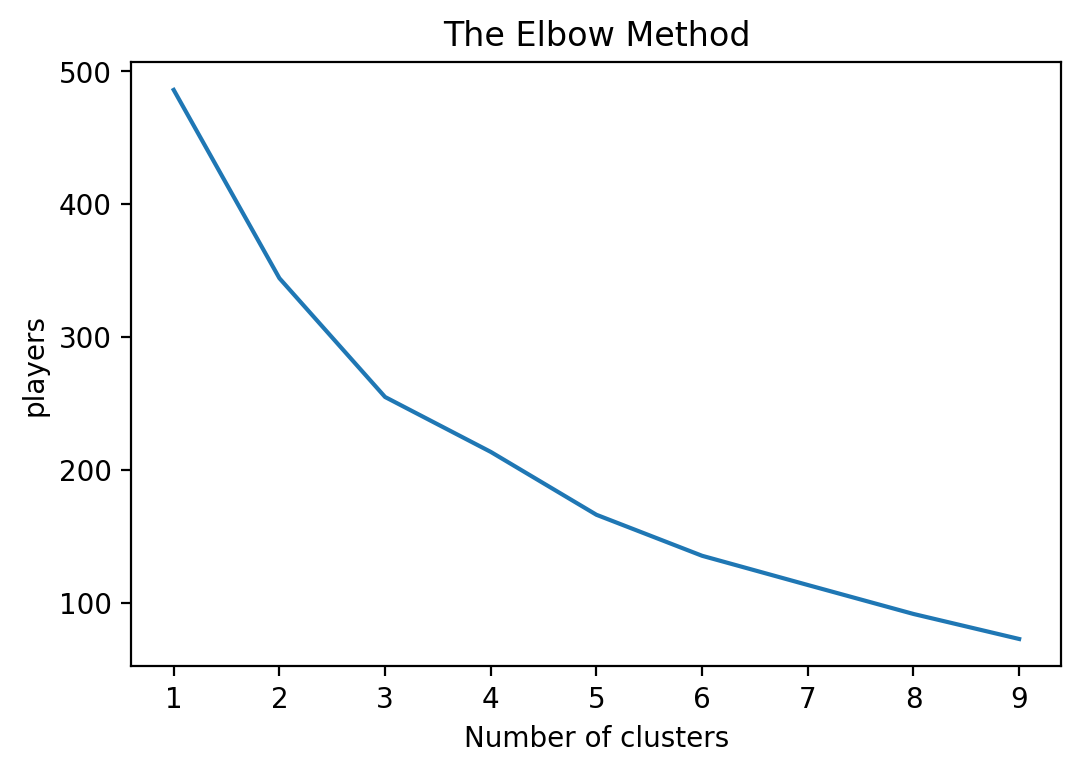

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1])

In [28]:
kmeans.cluster_centers_

array([[ 1.3370821 ,  1.60922198, -0.28326441,  1.66121453,  1.55906548,
         1.44580184,  1.64789661,  0.28305687,  1.09321633,  1.2694909 ,
        -0.14704292,  1.65498914,  1.46989324,  0.12641769,  1.3370821 ,
        -0.43187175, -0.72153652, -0.61503841, -0.74801384, -0.7142808 ,
         0.05996058, -0.48834658,  0.21982187, -0.33333333, -0.24253563,
         0.85334137, -0.35355339],
       [-0.90048386, -0.71840267, -0.36051834, -0.49622178, -0.41583936,
        -0.38563757, -0.48984731,  0.04200502, -0.31234752, -0.33407655,
        -0.07352146, -0.42565368, -0.50725727,  0.20080963, -0.90048386,
        -0.58012624, -0.48720453, -0.47032349, -0.4555552 , -0.45454233,
        -0.21226501, -0.16401649, -0.25365357, -0.11111111, -0.24253563,
        -0.18450624,  0.35355339],
       [ 0.55120527,  0.00574722,  0.87554454, -0.43577242, -0.49874153,
        -0.46249385, -0.43659212, -0.30205454, -0.31234752, -0.41425492,
         0.24997297, -0.55781469, -0.2628515 , -0.4625

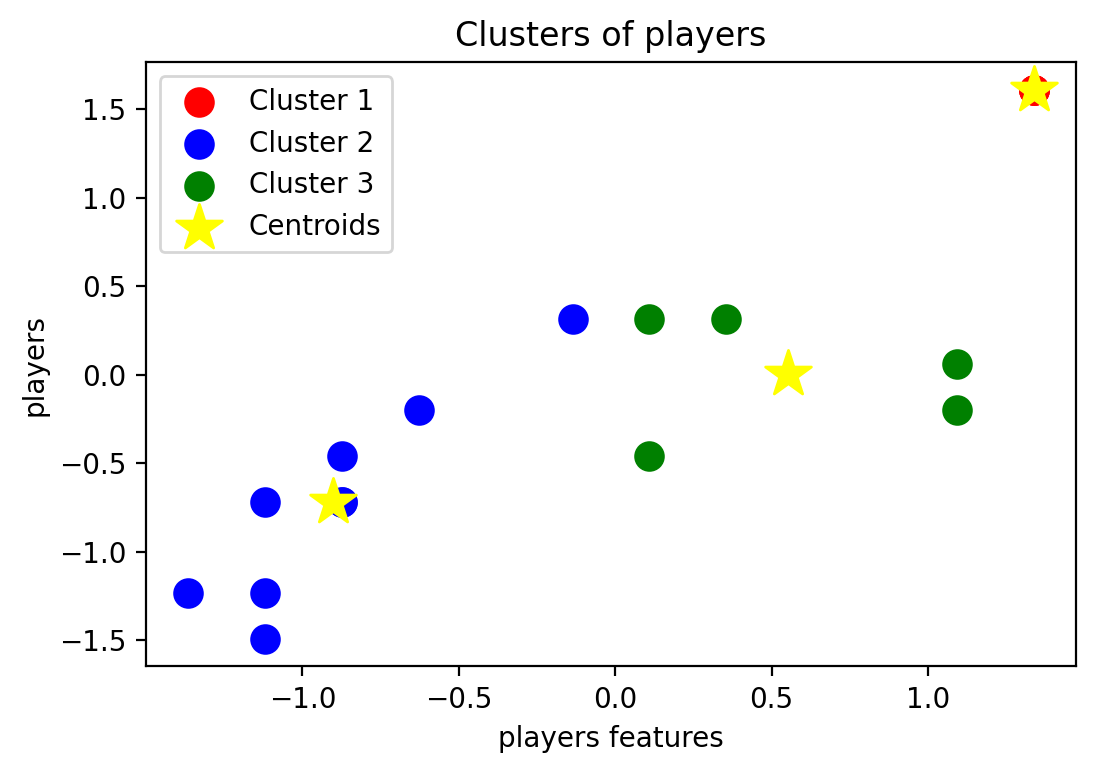

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Ireland_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MR Adair (IRE),9,8,2,117,32,19.50,101,115.84,0,...,509,15,4/19,33.93,6.30,32.2,2,0,2,0
1,A Balbirnie (IRE),14,13,1,567,145*,47.25,647,87.63,3,...,-,-,-,-,-,-,-,-,5,0
2,J Cameron-Dow (IRE),4,1,1,7,7*,-,10,70.00,0,...,151,5,3/32,30.20,4.87,37.2,0,0,2,0
3,GH Dockrell (IRE),10,8,0,143,54,17.87,223,64.12,0,...,420,8,3/51,52.50,5.67,55.5,0,0,4,0
4,SC Getkate (IRE),3,2,1,23,16*,23.00,23,100.00,0,...,120,6,2/30,20.00,4.44,27.0,0,0,1,0
5,JB Little (IRE),4,2,0,9,9,4.50,8,112.50,0,...,262,5,4/45,52.40,7.27,43.2,1,0,0,0
6,AR McBrine (IRE),9,5,1,18,9*,4.50,41,43.90,0,...,277,9,2/37,30.77,3.79,48.6,0,0,3,0
7,BJ McCarthy (IRE),4,4,1,28,18,9.33,42,66.66,0,...,204,4,2/76,51.00,6.27,48.7,0,0,0,0
8,JA McCollum (IRE),8,8,0,165,73,20.62,240,68.75,0,...,-,-,-,-,-,-,-,-,1,0
9,TJ Murtagh (IRE),13,7,3,27,12,6.75,49,55.10,0,...,565,16,5/21,35.31,4.77,44.3,0,1,3,0


In [31]:
Ireland_2019["cluster"] = y_kmeans

In [32]:
Ireland_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MR Adair (IRE),9,8,2,117,32,19.50,101,115.84,0,...,15,4/19,33.93,6.30,32.2,2,0,2,0,2
1,A Balbirnie (IRE),14,13,1,567,145*,47.25,647,87.63,3,...,-,-,-,-,-,-,-,5,0,0
2,J Cameron-Dow (IRE),4,1,1,7,7*,-,10,70.00,0,...,5,3/32,30.20,4.87,37.2,0,0,2,0,1
3,GH Dockrell (IRE),10,8,0,143,54,17.87,223,64.12,0,...,8,3/51,52.50,5.67,55.5,0,0,4,0,2
4,SC Getkate (IRE),3,2,1,23,16*,23.00,23,100.00,0,...,6,2/30,20.00,4.44,27.0,0,0,1,0,1
5,JB Little (IRE),4,2,0,9,9,4.50,8,112.50,0,...,5,4/45,52.40,7.27,43.2,1,0,0,0,1
6,AR McBrine (IRE),9,5,1,18,9*,4.50,41,43.90,0,...,9,2/37,30.77,3.79,48.6,0,0,3,0,2
7,BJ McCarthy (IRE),4,4,1,28,18,9.33,42,66.66,0,...,4,2/76,51.00,6.27,48.7,0,0,0,0,1
8,JA McCollum (IRE),8,8,0,165,73,20.62,240,68.75,0,...,-,-,-,-,-,-,-,1,0,1
9,TJ Murtagh (IRE),13,7,3,27,12,6.75,49,55.10,0,...,16,5/21,35.31,4.77,44.3,0,1,3,0,2


In [33]:
Ireland_2019['cluster'].value_counts()

1    9
2    5
0    4
Name: cluster, dtype: int64

In [34]:
Ireland_Cluster_2019 = np.array([4,9,5])

In [35]:
Ireland_Cluster_2019

array([4, 9, 5])

In [36]:
%store Ireland_Cluster_2019

Stored 'Ireland_Cluster_2019' (ndarray)


In [37]:
Ireland_2019_players_scaled.insert(0, 'Player', Ireland_2019.Player)

In [38]:
Ireland_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MR Adair (IRE),0.109150,0.316097,0.875545,-0.169407,-0.288298,0.088631,-0.393020,2.003198,-0.312348,...,0.361787,1.608104,1.623365,0.239517,1.132868,-0.039218,3.666667,-0.242536,-0.599645,-0.353553
1,A Balbirnie (IRE),1.337082,1.609222,-0.051503,2.144581,2.413994,2.081039,1.851372,0.675923,3.904344,...,-0.615038,-0.946239,-0.881256,-1.085626,-1.337181,-1.014783,-0.333333,-0.242536,0.645772,-0.353553
2,J Cameron-Dow (IRE),-1.118783,-1.494278,-0.051503,-0.735048,-0.886150,-1.311439,-0.767085,-0.153565,-0.312348,...,-0.615038,-0.188467,-0.046382,0.093841,0.572206,0.112267,-0.333333,-0.242536,-0.599645,-0.353553
3,GH Dockrell (IRE),0.354736,0.316097,-0.978550,-0.035710,0.237812,-0.028400,0.108474,-0.430218,-0.312348,...,0.361787,1.161471,0.454542,0.964772,0.885863,0.666703,-0.333333,-0.242536,0.230633,-0.353553
4,SC Getkate (IRE),-1.364369,-1.235653,-0.051503,-0.652773,-0.670923,0.339926,-0.713647,1.257929,-0.312348,...,0.036179,-0.344036,0.120593,-0.304522,0.403616,-0.196762,-0.333333,-0.242536,-1.014784,-0.353553
5,JB Little (IRE),-1.118783,-1.235653,-0.978550,-0.724764,-0.838322,-0.988346,-0.775306,1.846051,-0.312348,...,-0.615038,0.368570,-0.046382,0.960866,1.513177,0.294050,1.666667,-0.242536,-1.429923,-0.353553
6,AR McBrine (IRE),0.109150,-0.459778,-0.051503,-0.678484,-0.838322,-0.988346,-0.639656,-1.381565,-0.312348,...,1.989830,0.443846,0.621517,0.116102,0.148769,0.457654,-0.333333,-0.242536,-0.184506,-0.353553
7,BJ McCarthy (IRE),-1.118783,-0.718403,-0.051503,-0.627062,-0.623095,-0.641559,-0.635545,-0.310712,-0.312348,...,-0.289430,0.077506,-0.213357,0.906189,1.121106,0.460683,-0.333333,-0.242536,-1.429923,-0.353553
8,JA McCollum (IRE),-0.136437,0.316097,-0.978550,0.077419,0.692180,0.169046,0.178355,-0.212378,-0.312348,...,-0.615038,-0.946239,-0.881256,-1.085626,-1.337181,-1.014783,-0.333333,-0.242536,-1.014784,-0.353553
9,TJ Murtagh (IRE),1.091496,0.057472,1.802592,-0.632204,-0.766579,-0.826799,-0.606771,-0.854607,-0.312348,...,2.966656,1.889132,1.790340,0.293413,0.532999,0.327376,-0.333333,4.123106,-0.184506,-0.353553


In [39]:
Ireland_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,MR Adair (IRE),0.088631,0.239517
1,A Balbirnie (IRE),2.081039,-1.085626
2,J Cameron-Dow (IRE),-1.311439,0.093841
3,GH Dockrell (IRE),-0.028400,0.964772
4,SC Getkate (IRE),0.339926,-0.304522
5,JB Little (IRE),-0.988346,0.960866
6,AR McBrine (IRE),-0.988346,0.116102
7,BJ McCarthy (IRE),-0.641559,0.906189
8,JA McCollum (IRE),0.169046,-1.085626
9,TJ Murtagh (IRE),-0.826799,0.293413


In [40]:
Ireland_2019_Ave=Ireland_2019_players_scaled.mean()

In [41]:
Ireland_2019_Ave

Mat_x           6.167906e-17
Inns_x          1.079383e-17
NO             -6.167906e-18
Runs_x         -6.167906e-17
HS             -1.541976e-18
Ave_x          -1.511137e-16
BF             -7.709882e-18
SR_x            8.187895e-16
100            -5.551115e-17
50              8.018277e-17
0              -8.635068e-17
4s             -3.083953e-18
6s              2.467162e-17
Unnamed: 0_y    9.868649e-17
Mat_y           6.167906e-17
Inns_y          7.401487e-17
Overs          -7.401487e-17
Mdns           -1.233581e-17
Runs_y          2.467162e-17
Wkts           -4.934325e-17
Ave_y          -2.467162e-17
Econ           -9.868649e-17
SR_y           -7.401487e-17
4              -7.401487e-17
5              -4.317534e-17
Ct             -4.934325e-17
St             -6.476301e-17
dtype: float64

In [42]:
Ireland_Ave_2019 =Ireland_2019_Ave[['Ave_x','Ave_y']]

In [43]:
Ireland_Ave_2019

Ave_x   -1.511137e-16
Ave_y   -2.467162e-17
dtype: float64

In [44]:
Ireland_Ave_2019 = np.array([Ireland_Ave_2019.Ave_x, Ireland_Ave_2019.Ave_y])

In [45]:
Ireland_Ave_2019

array([-1.51113689e-16, -2.46716228e-17])

In [46]:
%store Ireland_Ave_2019

Stored 'Ireland_Ave_2019' (ndarray)


In [47]:
Ireland_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MR Adair (IRE),9,8,2,117,32,19.50,101,115.84,0,...,15,4/19,33.93,6.30,32.2,2,0,2,0,2
1,A Balbirnie (IRE),14,13,1,567,145*,47.25,647,87.63,3,...,-,-,-,-,-,-,-,5,0,0
2,J Cameron-Dow (IRE),4,1,1,7,7*,-,10,70.00,0,...,5,3/32,30.20,4.87,37.2,0,0,2,0,1
3,GH Dockrell (IRE),10,8,0,143,54,17.87,223,64.12,0,...,8,3/51,52.50,5.67,55.5,0,0,4,0,2
4,SC Getkate (IRE),3,2,1,23,16*,23.00,23,100.00,0,...,6,2/30,20.00,4.44,27.0,0,0,1,0,1
5,JB Little (IRE),4,2,0,9,9,4.50,8,112.50,0,...,5,4/45,52.40,7.27,43.2,1,0,0,0,1
6,AR McBrine (IRE),9,5,1,18,9*,4.50,41,43.90,0,...,9,2/37,30.77,3.79,48.6,0,0,3,0,2
7,BJ McCarthy (IRE),4,4,1,28,18,9.33,42,66.66,0,...,4,2/76,51.00,6.27,48.7,0,0,0,0,1
8,JA McCollum (IRE),8,8,0,165,73,20.62,240,68.75,0,...,-,-,-,-,-,-,-,1,0,1
9,TJ Murtagh (IRE),13,7,3,27,12,6.75,49,55.10,0,...,16,5/21,35.31,4.77,44.3,0,1,3,0,2
